### Pretrained weights for CIFAR10 dataset with 90% test accuracy

In [7]:
import tensorflow as tf
import gdown
import os
import matplotlib.pyplot as plt

In [2]:
model_url = "https://drive.google.com/file/d/1e059jWtNaDxbCx7RLQWm_JPLVbiC8kbI/view?usp=drive_link"
FILE_ID = model_url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={FILE_ID}&export=download"
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)
model_filename = "cifar10_90.h5"
model_path = f"{models_dir}/{model_filename}"
gdown.download(download_url, model_path)

Downloading...
From: https://drive.google.com/uc?id=1e059jWtNaDxbCx7RLQWm_JPLVbiC8kbI&export=download
To: /home/vikas/Lab/Decoding NNs/models/cifar10_90.h5
100%|██████████| 5.55M/5.55M [00:01<00:00, 4.71MB/s]


'models/cifar10_90.h5'

In [3]:
model = tf.keras.models.load_model(model_path)

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}")

Test Loss: 0.45652008056640625
Test Accuracy: 0.9049000144004822


In [11]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [10]:
y_test_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step


In [15]:
y_test_preds[0]

array([4.4746081e-14, 1.2408806e-12, 5.3662002e-11, 9.9992889e-01,
       8.4482534e-12, 7.0945753e-05, 8.8766924e-08, 3.1304140e-13,
       5.8219136e-14, 2.7134783e-15], dtype=float32)

In [21]:
import random
random.sample(range(10), 5)

[2, 7, 6, 1, 8]

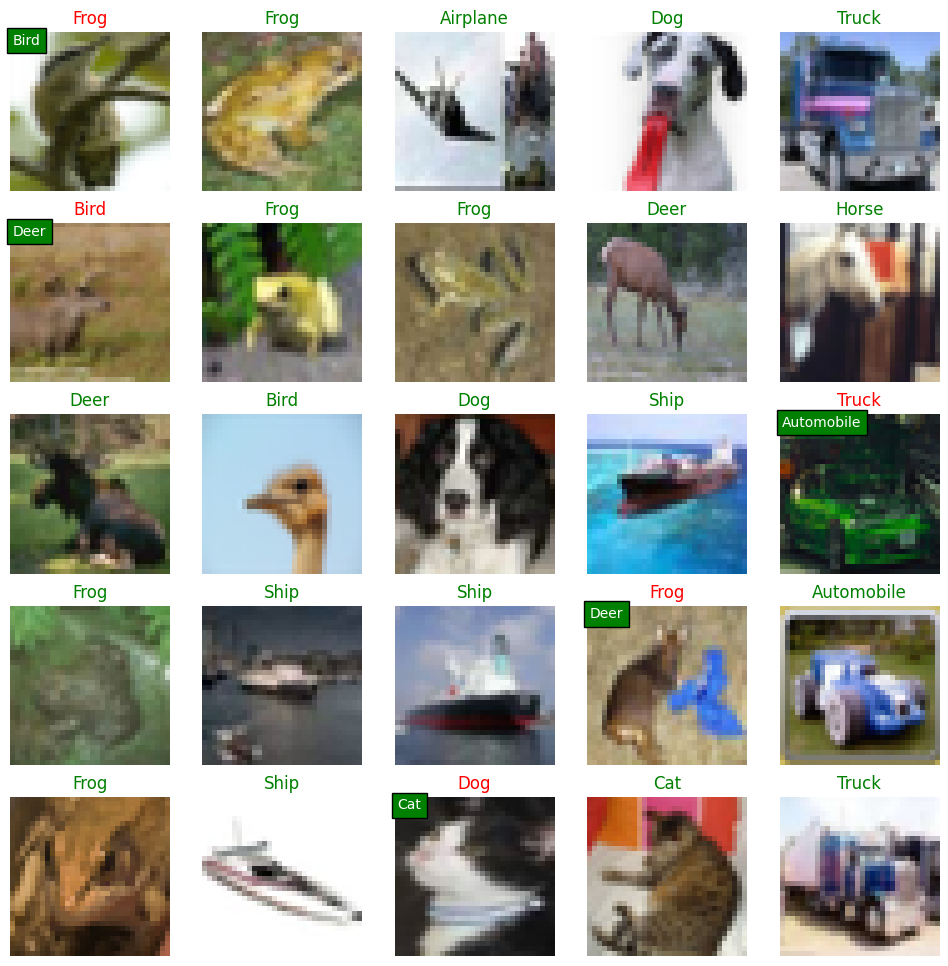

In [88]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, j in enumerate(random.sample(range(len(X_test)), 25)):
    ax = axes[i//5][i%5]
    ax.imshow(X_test[j])
    actual_class_name = class_names[y_test[j].argmax()]
    predicted_class_name = class_names[y_test_preds[j].argmax()]
    title_color = "green"
    if y_test_preds[j].argmax() != y_test[j].argmax():
        ax.text(0, 2, actual_class_name, color='white', bbox=dict(facecolor='green'))
        title_color = "red"
    ax.set_title(predicted_class_name, color=title_color)
    ax.axis("off")